## Linear Regression with Multiple Variables

In the previous tutorial, we went over the woking of Linear Regression using single independent variable i.e. "x". But in real life scenario, the data is not that simple as we considered in the example above. The dataset might have a lot of different features. We might do feature selection and reduce the number of features but still there will be more than one features.

Hence, to solve this problem, we require a hypothesis equation able of handling and considering more than one independent variable "x". So, how can we represent that ??

Well, by adding more "x's" to the equation. Easy as that.

So, the new hypothesis for Multiple variables can be written in the simple forms as:

#### y = m1X1 + m2X2 + m3X3 + . . . . . . . .+ mnXn

So, here in this tutorial, we will be using the very basic eqaution for hypothesis i.e.:

#### y = m1X1 + m2X2 + b

So, what does this equation tells us ?? It tells us that we have two features and one bias term. For each feature we have the coefficients m1 and m2 which are also called as "Weights".

So, let's get started....


### Step-1: Import Dependencies:

* numpy: for numerical analysis

* pandas: to load and modify the data

* matplotlib: to plot the data

In [23]:
# Import Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

%matplotlib inline

### Step-2: Load Dataset

So, once we are done with this, let's firstly load and visualize our data. Since, we require multiple features, so the Swedish Insurance Dataset that we have been using would not hold well...

So, for this tutorial, we'll be using "Diamonds" dataset where the aim is to predict/estimate the price for the diamond given the input features like it's Cut, Carat, Color, Clarity, Depth etc..

So, let's have a look at our data...

In [24]:
# Load Dataset

df = pd.read_csv('diamonds.csv')

In [25]:
# Let's have a look at our data
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


Looks pretty good. Let's check if the data is balanced or not...
How do we do that ?? Well, we describe the data...

In [26]:
# Describe the Data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Well, that seems balanced to me. What next ?? Feature selection...


### Step-3: Feature Selection

So, we have seen on the top that what all columns our dataset has. But are all the features equally important. Maybe maybe not. So, how do we find that ?? 


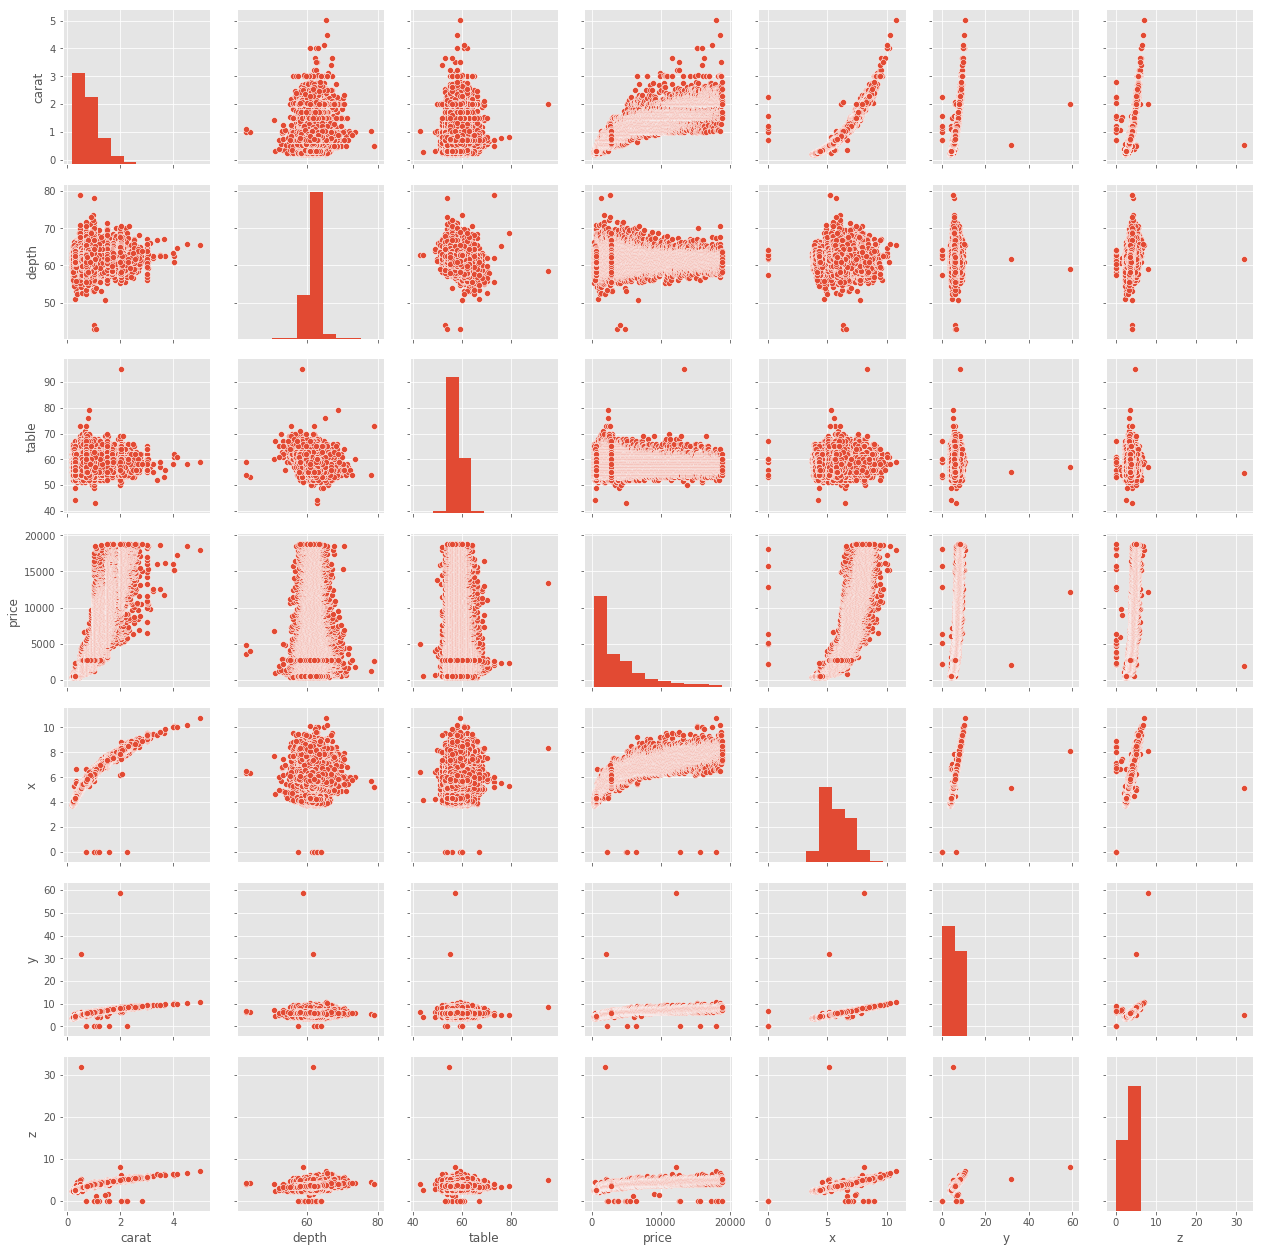

In [27]:
# Pairwise relationship for all Columns in dataset

sns.pairplot(df)

#### Correlation
Let's do it...

In [9]:
# Finding Correlation among features

df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Well, it looks like Carat is giving a pretty good information but wait a minute... Aren't we missing a feature ?? Well if you see the data described on the top, you would realize that we are missing the feature "Cut".

We know that when choosing a diamond, the "Cut" of diamond also plays a major role in deciding its price. But here we have cust given in the form of labels. So, how can we represent them ?? 

Well, one way is to map these labels to a integer representing their quality i.e. like a Fair diamond can be represented as "1", a Good one by "2" and so on. This provides us a way to quantify the feature "Cut".

So, how can we do this ?? Well one way is to use a dictionary with these values and map all values in the dataframe to these values. Let's do it.

In [10]:
# Create a dictionary mapping the feature "Cut"

d = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}

# Map/Replace all values in dataframe by the values in dictionary
df['cut'].replace(d, inplace=True)

Let's visualize the dataframe once again. Do we see any difference ??

In [12]:
# Print dataframe

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Well, now we have quantified the feature "Cut" and we have numerical values for them. Let's again check the Correlation.

In [13]:
# Correlation once again

df.corr()

,carat,cut,depth,table,price,x,y,z
carat,1.000000,-0.134967,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
depth,0.028224,-0.218055,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


So, from the above data, we take "Cut" and "Carat" as our features and "Price" as our labels for now.

Well, all said and done, we now have:

##### y = m1X1 + m2X2 + b

where,
##### X1 = "carat"

##### X2 = "Cut"

##### y = "price"

##### m1, m2: Weights

##### b: Bias

So, let's find out the missing values.

In [14]:
# Load the data in the form to be input to the function for Best Fit Line

X1 = np.array(df['carat'], dtype=np.float64)
X2 = np.array(df['cut'], dtype=np.float64)
y = np.array(df['price'], dtype=np.float64)

## Step-4: Define the Cost Function

As we remmber that for this tutorial we are using Squared error as our cost function. So, for a single variable, our Cost Function was as follows:

##### Cost Function [J] = (y_pred - y) ^ 2

where, 

##### y_pred = m*X + b

So, what will be the chage in the Cost Function for Multiple Variables ???

Yes, you guessed it right. Only our equation for y_pred has changed. So, now the Cost Function would be:

##### Cost Function [J] = (y_pred - y) ^ 2

where, 

##### y_pred = m1*X1 + m2*X2 + b

So, let's write the function for the same...

In [15]:
# Cost Function
def cost_Function(m1,m2,b,X1,X2,y):
    return sum(((m1*X2 + m2*X2 + b) - y)**2)/(2*float(len(X1)))

## Step-5: Gradient Descent

What changes would you have in the Gradient Descent Equations ?? You are right once again !!! Earlier we were taking gradients for m and b, now it would be w.r.t m1, m2 and b2 and similarly the updates.

So, 

##### J = ((m1*X1 + m2*X2 + b) - y) ^2

##### dJ/dm1 = X1 * ((m1*X1 + m2*X2 + b) - y)

##### dJ/dm2 = X2 * ((m1*X1 + m2*X2 + b) - y)

##### dJ/db = ((m1*X1 + m2*X2 + b) - y)

So, let's write the function for this.

In [16]:
# Gradient Descent
# X,y: Input Data Points
# m,b: Initial Slope and Bias
# alpha: Learning Rate
# iters: Number of Iterations for which we need to run Gradient Descent.

def gradientDescent(X1,X2,y,m1,m2,b,alpha,iters):
    # Initialize Values of Gradients
    gradient_m1 = 0
    gradient_m2 = 0
    gradient_b = 0
    # n: Number of items in a row
    a = 0
    # Array to store values of error for analysis
    hist = []
    # Perform Gradient Descent for iters
    for _ in range(iters):
        # Perform Gradient Descent
        gradient_m1 = X1 * ((m1*X1 + m2*X2 + b) - y)
        gradient_m2 = X2 * ((m1*X1 + m2*X2 + b) - y)
        gradient_b = ((m1*X1 + m2*X2 + b) - y)
        m1 = m1 - (alpha*gradient_m1)
        m2 = m2 - (alpha*gradient_m2)
        b = b - (alpha*gradient_b)
        # Calculate the change in error with new values of "m" and "b"
        a = cost_Function(m1,m2,b,X1,X2,y)
        hist.append(a)
    return [m1,m2,b,hist]

Now that we are all done with the functionc required, let's get this thing up and running.

In [18]:
# Main Function
if __name__ == '__main__':
    # Learning Rate
    # lr = 0.01; iters: 500; error: 492764
    # lr = 0.005; iters: 500 ; error: 492757
    # lr = 0.0001; iters: 2000; error: 485339
    # lr = 0.001; iters = 1500-1600; error: 492736
    # lr = 0.002; iters: 100; error: 488696
    lr = 0.001
    # Initial Values of "m" and "b"
    initial_m1 = 0
    initial_m2 = 0
    initial_b = 0

    # Number of Iterations
    iterations = 1500

    # Check error with initial Values of m and b
    print("Initial Error at m1 = {0}, m2 = {1} and b = {2} is error = {3}".format(initial_m1, initial_m2, initial_b, cost_Function(initial_m1, initial_m2, initial_b, X1, X2, y)))

    print("Starting gradient descent...")

    # Run Gradient Descent to get new values for "m" and "b"
    [m1, m2,b,hist] = gradientDescent(X1, X2, y, initial_m1, initial_m2, initial_b, lr, iterations)


    # New Values of "m" and "b" after Gradient Descent
    print('Values obtained after {0} iterations are m1 = {1}, m2 = {2} and b = {3} and error = {4}'.format(iterations,m1,m2,b,cost_Function(m1,m2, b, X1,X2, y)))


    # Calculating y_hat
    y_hat = (m1*X1 + m2*X2 + b)
    print('y_hat: ',y_hat)


Initial Error at m1 = 0, m2 = 0 and b = 0 is error = 15691124.007628847
Starting gradient descent...
Values obtained after 1500 iterations are m1 = [   2.87799055    4.01663919   14.87706207 ...,  183.97518966  133.6569032
   77.84470588], m2 = [  62.56501196   76.50741312  129.36575715 ...,  788.46509853  621.66001488
  518.96470588] and b = [  12.51300239   19.12685328   64.68287857 ...,  262.82169951  155.41500372
  103.79294118] and error = 492740.91713614506
y_hat:  [  326.           326.           326.83611715 ...,  2756.99962785
  2756.99999999  2757.        ]


As we can clearly see that we have reduced our initial error over time using Gradient Descent. Let's check how the error decrease using the Cost Function.

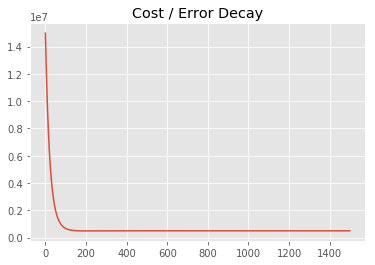

In [28]:
# Plot the decreasing cost

fig,ax = plt. subplots()
ax.plot(hist)
ax.set_title('Cost / Error Decay')

So, this shows the working of Linear Regression using Multiple Variables.

### Note: This example is just to demonstrate the use of the technique. This can certainly be improved more to get more insight.